In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [25]:
df= pd.read_excel("1730285881-Airbnb_Open_Data.xlsx", engine='openpyxl')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df.drop_duplicates(inplace=True)

df.rename(columns={
    'price': 'price_$',
    'service fee': 'service fee_$'
}, inplace=True)

df ['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])

# Fill missing values in 'Construction year' with 0 before converting to int
df['Construction year'] = df['Construction year'].fillna(0).astype(int)


df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'

In [ ]:
df.duplicated().value_counts()

,count
False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      int64         
 1   NAME                            1 non-null      object        
 2   host id                         1 non-null      object        
 3   host_identity_verified          1 non-null      object        
 4   host name                       1 non-null      object        
 5   neighbourhood group             1 non-null      object        
 6   neighbourhood                   1 non-null      object        
 7   lat                             1 non-null      float64       
 8   long                            1 non-null      float64       
 9   country                         1 non-null      object        
 10  country code                    1 non-null      object        
 11  instant

In [ ]:
df.describe()

,id,lat,long,instant_bookable,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.0,1.00000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1,1.00,1.0,1.0,1.0
mean,7139598.0,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
min,7139598.0,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
25%,7139598.0,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
50%,7139598.0,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
75%,7139598.0,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
max,7139598.0,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53429
Private room,46306
Shared room,2208
Hotel room,115


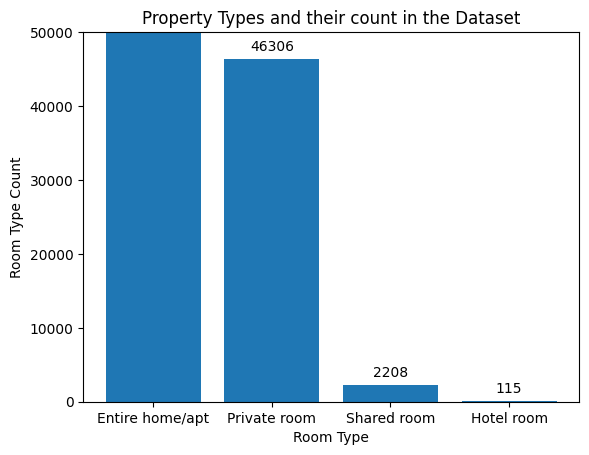

In [ ]:
room_type_bar = plt.bar(property_types.index, property_types['count'])
plt.bar_label(room_type_bar, labels=property_types['count'], padding=4)
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')
plt.show()

In [ ]:
hood_group= df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43558
Brooklyn,41631
Queens,13197
Bronx,2694
Staten Island,949


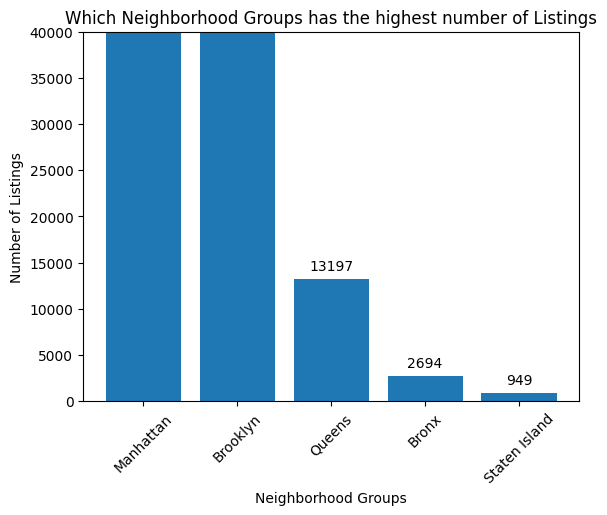

In [ ]:
hood_group_bar = plt.bar(hood_group.index, hood_group['count'])
plt.bar_label(hood_group_bar, labels=hood_group['count'], padding=4)
plt.ylim([0, 40000]) # Corrected the limit syntax
plt.xlabel("Neighborhood Groups")
plt.ylabel('Number of Listings')
plt.xticks(rotation=45) # Corrected the rotation syntax
plt.title('Which Neighborhood Groups has the highest number of Listings')
plt.show()

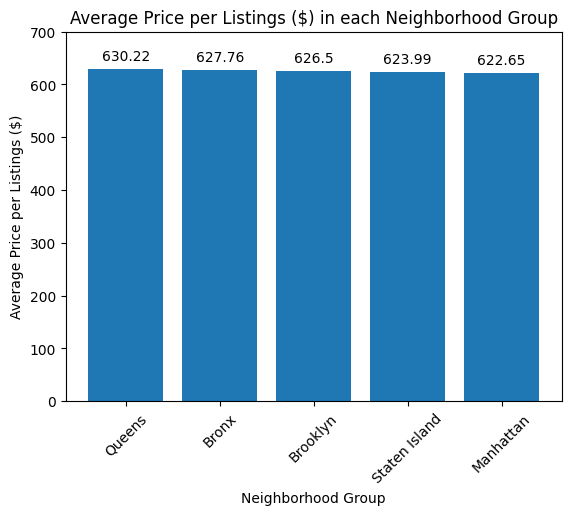

In [ ]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price['price_$'], 2), padding=4)
plt.ylim(0, 700)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.title('Average Price per Listings ($) in each Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

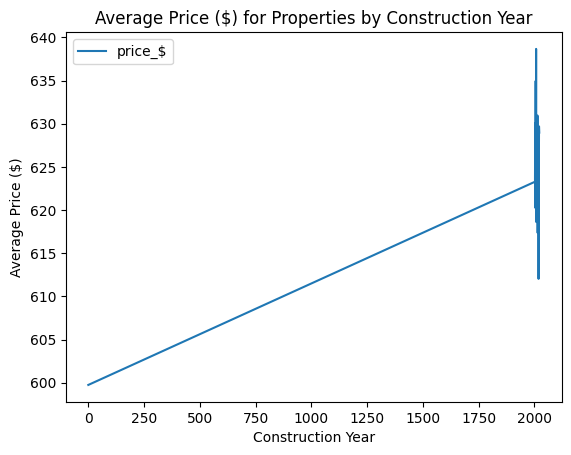

In [ ]:

df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties by Construction Year');
plt.show()

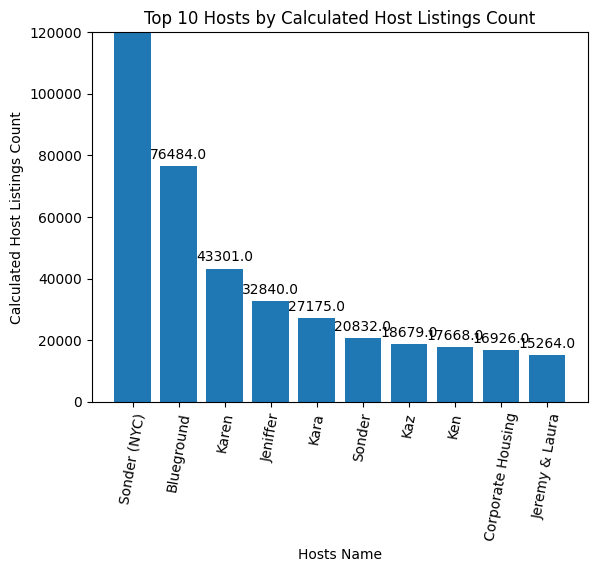

In [30]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, labels=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3)

plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')

plt.show()

In [33]:
review=df.groupby('host_identity_verified') ['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.286684
unconfirmed,3.271767


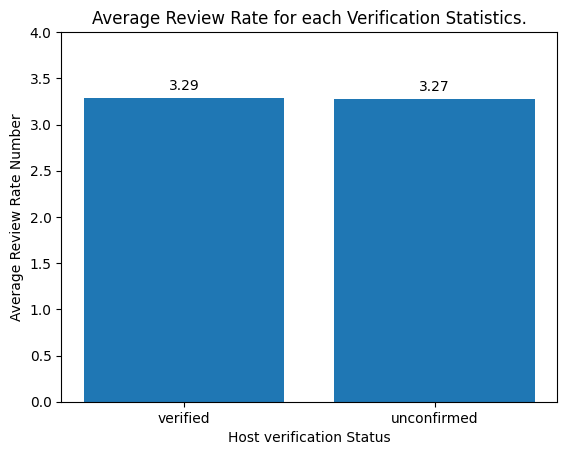

In [35]:
review_bar=plt.bar(review.index, review.loc[:, "review rate number"]);

plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding = 4);

plt.ylim([0,4]);

plt.xlabel('Host verification Status');

plt.ylabel('Average Review Rate Number');

plt.title('Average Review Rate for each Verification Statistics.');
plt.show()

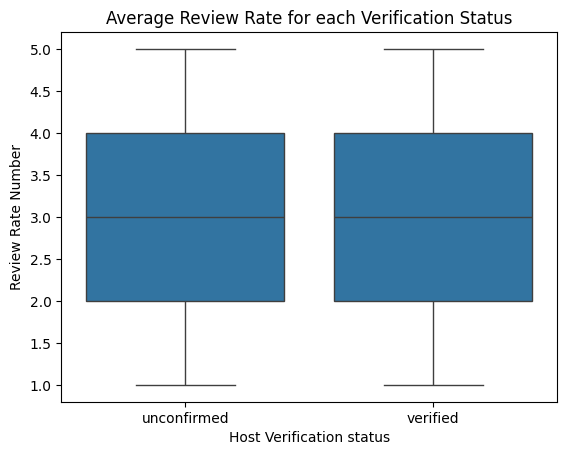

In [36]:
base_color=sns.color_palette()[0]

sns.boxplot(data = df, x = "host_identity_verified", y= "review rate number", color = base_color);

plt.xlabel('Host Verification status');

plt.ylabel('Review Rate Number');

plt.title('Average Review Rate for each Verification Status');

In [40]:
df["price"].corr(df["service fee"])


np.float64(0.9999908755543332)

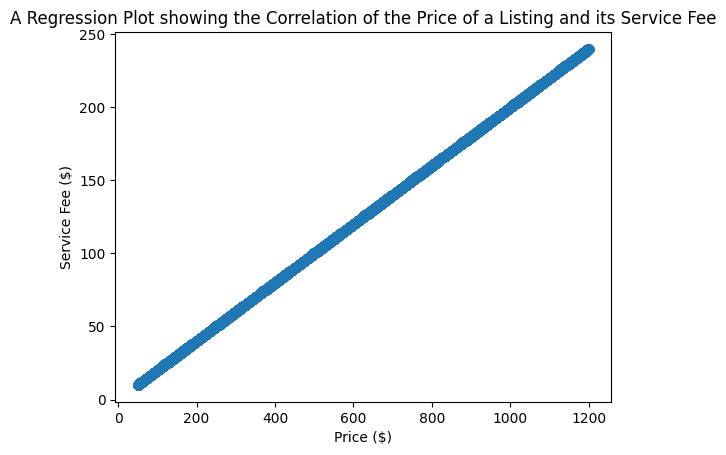

In [45]:
sns.regplot(data=df, x="price", y="service fee")

plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")
plt.title("A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee")
plt.show()

In [46]:
ARRN =df.groupby(['neighbourhood group', 'room type']) ['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346457
                    Private room               3.329706
                    Shared room                3.264957
Brooklyn            Entire home/apt            3.250378
                    Hotel room                 3.750000
                    Private room               3.264465
                    Shared room                3.336983
Manhattan           Entire home/apt            3.275807
                    Hotel room                 3.500000
                    Private room               3.277576
                    Shared room                3.257459
Queens              Entire home/apt            3.349154
                    Hotel room                 3.750000
                    Private room               3.315585
                    Shared room                3.377778
Staten Island       Entire home/apt            3.329087
                    Private room               3.479482
                    Shared room                3.533333
brookln             Private room               4.000000
manhatan            Private room               3.000000

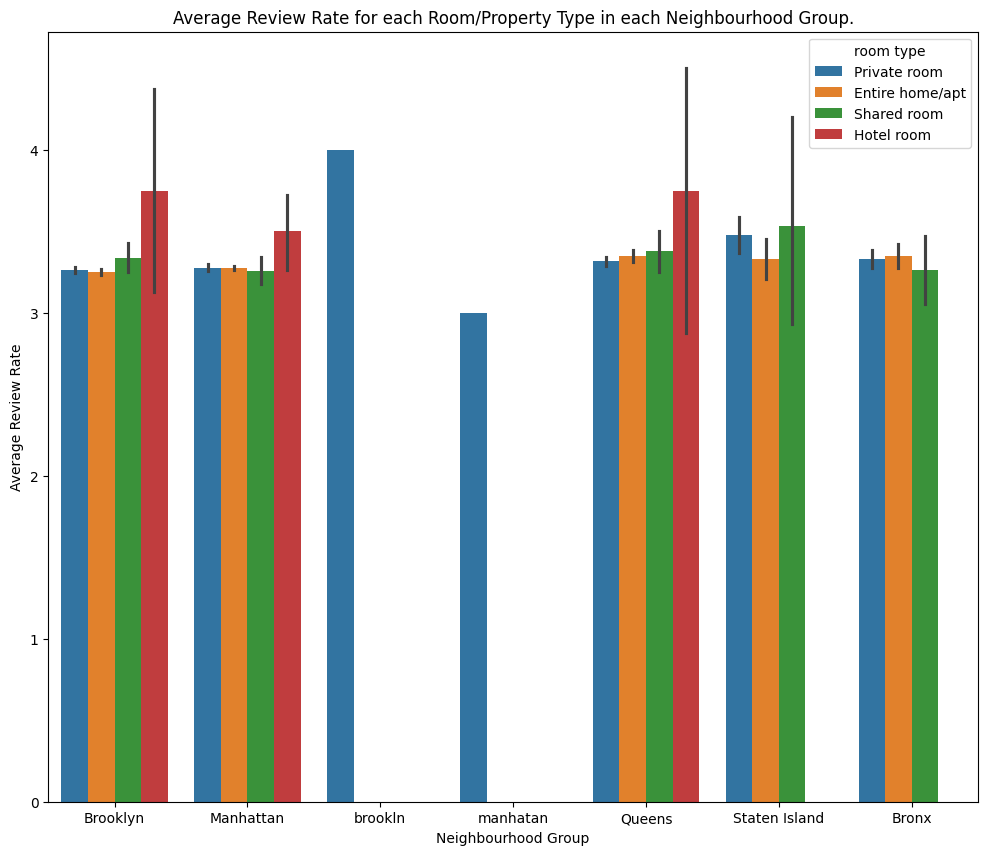

In [48]:
plt.figure(figsize=[12,10]);

sns.barplot(data= df, x = 'neighbourhood group', y ='review rate number', hue ='room type');

plt.xlabel('Neighbourhood Group');

plt.ylabel("Average Review Rate");

plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');
plt.show()

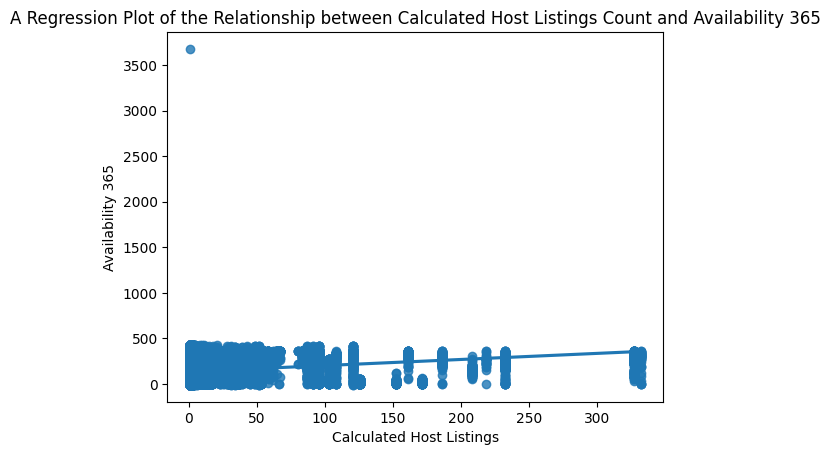

In [49]:
sns.regplot (df, x ='calculated host listings count', y ='availability 365');

plt.xlabel('Calculated Host Listings');

plt.ylabel('Availability 365');

plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [51]:
df ['calculated host listings count'].corr(df['availability 365'])

np.float64(0.15919424228130621)